# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import all packages
import pandas as pd
import numpy as np
import requests
import os
import json
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2]:
#read the csv file
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#creating a folder
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
#accessing the content and writing the file
with open(os.path.join(folder_name, 
                       url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
#confirming list
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
#reading the tsv file in pandas dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt). 

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
# reading the json file in pandas dataframe
tweet_json = pd.read_json('tweet-json.txt', lines=True, encoding = 'utf-8')
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [8]:
#creating a new dataframe from the above data with selected columns
tweet_json_new = pd.DataFrame(tweet_json, columns = ['id', 'favorite_count', 'retweet_count'])

## Assessing Data

In [9]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
twitter_archive_enhanced.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1839,675891555769696257,NaN,NaN,2015-12-13 04:14:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Donny. He's summoning the demon monste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675891555...,6,10,Donny,None,None,None,None


In [11]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [14]:
tweet_json_new

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [15]:
tweet_json_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues
All quality issues from all tables have been documented here. We will fix these issues in the cleaning phase of this analysis.

1. 2356 sample data in 'twitter_archive_enhanced' and 2075 predictions in `image_predictions`


2. words like 'a', 'an', 'the', 'this','one' represented as names in `twitter_archive_enhanced`


3. rating numerator and denominator over 10 like 50, 130, 110, 16, 20 in `twitter_archive_enhanced`


4. unneccessary columns like retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id in `twitter_archive_enhanced`


5. strange strings in source column in `twitter_archive_enhanced`


6. +0000 values in timestamp which are unnecessary in `twitter_archive_enhanced`


7. (upper/lower) case inconsistencies in p1, p2, p3 in `image_predictions`


8. words in p1 p2, p3 separated by underscores rather than spaces in `image_predictions`

### Tidiness issues
1. doggo, floofer, pupper, puppo represented as columns instead of categorical data type in `twitter_archive_enhanced`


2. `tweet_json`, `twitter_archive_enhanced`, `image_prediction` should be one dataset


3. Erroneous data type format in all datasets

## Cleaning Data
All issues documented in the assessing stage would be cleaned here.

In [16]:
# Make copies of original pieces of data
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_new_clean = tweet_json_new.copy()

### Issue #1: `tweet_json_new`, `twitter_archive_enhanced`, `image_prediction` should be one dataset

#### Define: 
 Merge `tweet_json_new`, `image_prediction`, `twitter_archive_enhanced` datasets on tweet_id and store in `final_archive`

#### Code

In [17]:
# first lets change id in tweet_json to tweet_id
tweet_json_new_clean = tweet_json_new_clean.rename(columns={"id":"tweet_id"})

In [18]:
#merge all 3 dataset. merge tweet_json_new_clean and twitter_archive_enhanced_clean
tweet_archive = pd.merge(twitter_archive_enhanced_clean, tweet_json_new_clean, on = 'tweet_id', how= 'left')

In [19]:
#merge image_prediction to tweet_archive and store in final_archive dataframe
final_archive = pd.merge(tweet_archive, image_predictions_clean, on = 'tweet_id', how = 'left')

#### Test

In [20]:
# confirm new dataframe
final_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [21]:
# check information of our combined dataframe
final_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2: 2356 sample data in 'twitter_archive_enhanced' and 2075 predictions in `image_predictions`

#### Define
The incosistency in the number of sample data for both dataset could have been due to no image in tweets. Hence, we would drop rows without images

#### Code

In [22]:
#check the number tweets with no image and drop them
final_archive.jpg_url.isnull().sum()

281

In [23]:
# drop the 281 tweets without images
final_archive.dropna(subset=['jpg_url'], inplace=True)

#### Test

In [24]:
# check to confirm if it has been successfully dropped
final_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

## Issue 3: unneccessary columns like retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id in `twitter_archive_enhanced`

### Define : 
After dropping rows without an image, the retwets and in-replies dropped from 181 and 78 to 81 and 23 respectively. Hence those columns should be dropped as we have no use for them. But first we should drop all retweets.

### Code

In [25]:
retweeted_tweets = final_archive[final_archive.retweeted_status_id.notnull()].index.tolist()

In [26]:
final_archive.drop(retweeted_tweets, inplace = True)

In [27]:
# drop unnecessary columns
final_archive = final_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

### Test

In [28]:
# confirm columns
final_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  favorite_count      1994 non-null   float64
 13  retweet_count       1994 non-null   float64
 14  jpg_url             1994 non-null   object 
 15  img_num             1994 non-null   float64
 16  p1    

## Issue 4:  doggo, floofer, pupper, puppo represented as columns instead of categorical data type 

#### Define
Melt the doggo, floofer, pupper and puppo columns into a catergory: Dog Stage

#### Code

In [29]:
final_archive.doggo.value_counts()

None     1920
doggo      74
Name: doggo, dtype: int64

In [30]:
final_archive.floofer.value_counts()

None       1986
floofer       8
Name: floofer, dtype: int64

In [31]:
final_archive.pupper.value_counts()

None      1782
pupper     212
Name: pupper, dtype: int64

In [32]:
final_archive.puppo.value_counts()

None     1971
puppo      23
Name: puppo, dtype: int64

In [33]:
final_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorite_count', 'retweet_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [34]:
final_archive['dog_stage'] = final_archive.doggo + final_archive.floofer + final_archive.pupper + final_archive.puppo

final_archive['dog_stage'].loc[final_archive['dog_stage'] == 'NoneNoneNoneNone'] = 'None'
final_archive['dog_stage'].loc[final_archive['dog_stage'] == 'doggoNoneNoneNone'] = 'doggo'
final_archive['dog_stage'].loc[final_archive['dog_stage'] == 'NoneNonepupperNone'] = 'pupper'
final_archive['dog_stage'].loc[final_archive['dog_stage'] == 'NoneNoneNonepuppo'] = 'puppo'
final_archive['dog_stage'].loc[final_archive['dog_stage'] == 'NoneflooferNoneNone'] = 'floofer'
final_archive['dog_stage'].loc[final_archive['dog_stage'] == 'doggpNoneNonepuppo'] = 'doggo'
final_archive['dog_stage'].loc[final_archive['dog_stage'] == 'doggoNonepupperNone'] = 'doggo'
final_archive['dog_stage'].loc[final_archive['dog_stage'] == 'doggoflooferNoneNone'] = 'doggo'

final_archive.drop(columns=['floofer', 'puppo', 'doggo', 'pupper'], inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_3936\2463459743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_archive['dog_stage'].loc[final_archive['dog_stage'] == 'NoneNoneNoneNone'] = 'None'
C:\Users\user\AppData\Local\Temp\ipykernel_3936\2463459743.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_archive['dog_stage'].loc[final_archive['dog_stage'] == 'doggoNoneNoneNone'] = 'doggo'
C:\Users\user\AppData\Local\Temp\ipykernel_3936\2463459743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

#### Test

In [35]:
final_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   favorite_count      1994 non-null   float64
 9   retweet_count       1994 non-null   float64
 10  jpg_url             1994 non-null   object 
 11  img_num             1994 non-null   float64
 12  p1                  1994 non-null   object 
 13  p1_conf             1994 non-null   float64
 14  p1_dog              1994 non-null   object 
 15  p2                  1994 non-null   object 
 16  p2_con

In [36]:
final_archive.dog_stage.value_counts()

None                  1688
pupper                 203
doggo                   73
puppo                   22
floofer                  7
doggoNoneNonepuppo       1
Name: dog_stage, dtype: int64

In [37]:
final_archive[final_archive['dog_stage'] == 'doggoNoneNonepuppo']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,47844.0,19196.0,...,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.0961,True,doggoNoneNonepuppo


In [38]:
final_archive['dog_stage'] = final_archive['dog_stage'].replace(['doggoNoneNonepuppo'],'doggo')

In [39]:
final_archive.dog_stage.value_counts()

None       1688
pupper      203
doggo        74
puppo        22
floofer       7
Name: dog_stage, dtype: int64

## Issue 5 : +0000 values in timestamp which are unnecessary

### Define
remove the +0000 values in timestamp 

### Code

In [40]:
#extract the last 5 values 
final_archive.timestamp = final_archive["timestamp"].str[:-5]

### Test

In [41]:
#check to see if it has been removed
final_archive

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467.0,8853.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819.0,6514.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461.0,4328.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908.0,8964.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048.0,9774.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,111.0,41.0,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,None
2352,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,311.0,147.0,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,None
2353,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,128.0,47.0,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,None
2354,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,132.0,48.0,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,None


## Issue 6 : Erroneous data type format in timestamp

### Define
Change data time format for timestamp to datatime

### Code

In [42]:
final_archive['timestamp'] = pd.to_datetime(final_archive['timestamp'])

### Test

In [43]:
final_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   int64         
 1   timestamp           1994 non-null   datetime64[ns]
 2   source              1994 non-null   object        
 3   text                1994 non-null   object        
 4   expanded_urls       1994 non-null   object        
 5   rating_numerator    1994 non-null   int64         
 6   rating_denominator  1994 non-null   int64         
 7   name                1994 non-null   object        
 8   favorite_count      1994 non-null   float64       
 9   retweet_count       1994 non-null   float64       
 10  jpg_url             1994 non-null   object        
 11  img_num             1994 non-null   float64       
 12  p1                  1994 non-null   object        
 13  p1_conf             1994 non-null   float64     

## Issues 7 : (upper/lower) case inconsistencies in p1, p2, p3

### Define
convert all values in p1, p2, p3 to lower case

### Code

In [44]:
# convert to lowe case
final_archive['p1'] = final_archive['p1'].str.lower()
final_archive['p2'] = final_archive['p2'].str.lower()
final_archive['p3'] = final_archive['p3'].str.lower()

### Test

In [46]:
# confirm the case for each column
final_archive.p1

0                       orange
1                    chihuahua
2                    chihuahua
3                  paper_towel
4                       basset
                 ...          
2351        miniature_pinscher
2352       rhodesian_ridgeback
2353           german_shepherd
2354                   redbone
2355    welsh_springer_spaniel
Name: p1, Length: 1994, dtype: object

In [47]:
final_archive.p2

0                    bagel
1                 pekinese
2                 malamute
3       labrador_retriever
4         english_springer
               ...        
2351            rottweiler
2352               redbone
2353              malinois
2354    miniature_pinscher
2355                collie
Name: p2, Length: 1994, dtype: object

In [48]:
final_archive.p3

0                            banana
1                          papillon
2                            kelpie
3                           spatula
4       german_short-haired_pointer
                   ...             
2351                       doberman
2352             miniature_pinscher
2353                     bloodhound
2354            rhodesian_ridgeback
2355              shetland_sheepdog
Name: p3, Length: 1994, dtype: object

## Issue 8 : words in p1 p2, p3 separated by underscores rather than spaces

### Define
Change the underscores in p1, p2 and p3 to spaces 

### Code

In [49]:
# replace underscore with spaces
final_archive['p1'] = final_archive['p1'].str.replace('_', ' ')
final_archive['p2'] = final_archive['p2'].str.replace('_', ' ')
final_archive['p3'] = final_archive['p3'].str.replace('_', ' ')

### Test

In [50]:
# confirm
final_archive.p1

0                       orange
1                    chihuahua
2                    chihuahua
3                  paper towel
4                       basset
                 ...          
2351        miniature pinscher
2352       rhodesian ridgeback
2353           german shepherd
2354                   redbone
2355    welsh springer spaniel
Name: p1, Length: 1994, dtype: object

In [51]:
final_archive.p2

0                    bagel
1                 pekinese
2                 malamute
3       labrador retriever
4         english springer
               ...        
2351            rottweiler
2352               redbone
2353              malinois
2354    miniature pinscher
2355                collie
Name: p2, Length: 1994, dtype: object

In [52]:
final_archive.p3

0                            banana
1                          papillon
2                            kelpie
3                           spatula
4       german short-haired pointer
                   ...             
2351                       doberman
2352             miniature pinscher
2353                     bloodhound
2354            rhodesian ridgeback
2355              shetland sheepdog
Name: p3, Length: 1994, dtype: object

## Issues 9: words like 'a', 'an', 'the', 'this','one' represented as names in `twitter_archive_enhanced`

### Define
Replace words that are clearly not names with None

### Code

In [53]:
# check all the values in the name column. it is evident that those that are not names begin with lowe case
final_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [54]:
names=[]

#call a function to check if the first letter is lowercase.
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
# call function using pandas apply by columns
final_archive.apply(incorrect_name, axis=1)


#add names list to master dataframe and check dataframe
final_archive['names'] = names
final_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,names
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467.0,8853.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None,Phineas
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819.0,6514.0,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,None,Tilly
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461.0,4328.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None,Archie
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908.0,8964.0,...,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,None,Darla
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048.0,9774.0,...,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,None,Franklin


In [55]:
# update orginal column
final_archive['name'] = final_archive['names']

In [56]:
#drop the 'names' column
final_archive = final_archive.drop('names', axis = 1)

### Test

In [57]:
final_archive.name.value_counts()

None          644
Charlie        11
Cooper         10
Lucy           10
Oliver         10
             ... 
Leela           1
Glenn           1
Shelby          1
Sephie          1
Christoper      1
Name: name, Length: 914, dtype: int64

## Issue 10 : rating numerator and denominator over 10 like 50, 130, 110, 16, 20 in twitter_archive_enhanced

### Define 
Since the rating denominators with rating more than 10 is also linked to the numerators strange values, they will be dropped. 


### Code

In [58]:
final_archive.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
45        1
144       1
88        1
26        1
121       1
143       1
44        1
60        1
165       1
80        1
99        1
50        1
204       1
1776      1
27        1
75        1
24        1
84        1
420       1
Name: rating_numerator, dtype: int64

In [59]:
final_archive.rating_denominator.value_counts()

10     1976
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
130       1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [60]:
# check rows that have denominator more than 10 and drop the rows 
rating_denom = final_archive[final_archive['rating_denominator'] > 10]
rating_denom

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,13518.0,3716.0,...,west highland white terrier,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True,None
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,5316.0,2539.0,...,labrador retriever,0.436377,True,chihuahua,0.113956,True,american staffordshire terrier,0.099689,True,None
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,20648.0,9220.0,...,golden retriever,0.807644,True,kuvasz,0.101286,True,labrador retriever,0.023785,True,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,None,4196.0,1434.0,...,lakeside,0.501767,False,breakwater,0.051351,False,king penguin,0.049444,False,None
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,4493.0,1764.0,...,great dane,0.246762,True,greater swiss mountain dog,0.126131,True,weimaraner,0.085297,True,None
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,2574.0,247.0,...,siberian husky,0.396495,True,malamute,0.317053,True,eskimo dog,0.273419,True,None
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,3062.0,829.0,...,golden retriever,0.371816,True,cocker spaniel,0.177413,True,irish setter,0.092725,True,None
1254,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,2529.0,636.0,...,soft-coated wheaten terrier,0.948617,True,dandie dinmont,0.018664,True,cairn,0.015943,True,None
1274,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,2634.0,721.0,...,borzoi,0.490783,True,wire-haired fox terrier,0.083513,True,english setter,0.083184,True,None
1351,704054845121142784,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,None,3201.0,1028.0,...,great pyrenees,0.667939,True,kuvasz,0.228764,True,golden retriever,0.043885,True,None


In [61]:
# drop rows with rating denominator greater than 10
final_archive = final_archive.drop(final_archive[final_archive['rating_denominator'] > 10].index)

### Test

In [62]:
final_archive.rating_denominator.value_counts()

10    1976
7        1
2        1
Name: rating_denominator, dtype: int64

In [63]:
# strange numerators values are now gone but i still see values like 1776, 420
final_archive.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
9       150
8        95
7        51
14       35
5        33
6        32
3        19
4        15
2         9
1         5
0         2
26        1
27        1
1776      1
75        1
24        1
420       1
Name: rating_numerator, dtype: int64

In [64]:
# the numerator values remaining that seem strange is actually not, since the denominator is 10. 
# And that was the rating it was given

final_archive[final_archive['rating_numerator'] > 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,5927.0,1655.0,...,golden retriever,0.871342,True,tibetan mastiff,0.036708,True,labrador retriever,0.025823,True,None
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,20296.0,7069.0,...,pomeranian,0.467321,True,persian cat,0.122978,False,chow,0.102654,True,None
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,7320.0,1885.0,...,clumber,0.946718,True,cocker spaniel,0.015950,True,lhasa,0.006519,True,pupper
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,5569.0,2772.0,...,bow tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,None
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,1879.0,542.0,...,kuvasz,0.438627,True,samoyed,0.111622,True,great pyrenees,0.064061,True,None
2074,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,7989.0,4324.0,...,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,None


## Reduce predictons to One 

In [65]:
# create 2 empty lists 
breed = []
confidence = []

# create a function to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply 
final_archive.apply(breed_confidence, axis=1)

# add lists created to master dataframe
final_archive['breed'] = breed
final_archive['confidence'] = confidence

# confirm added columns 
final_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467.0,8853.0,...,False,bagel,0.085851,False,banana,0.076110,False,None,Unknown,0.000000
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819.0,6514.0,...,True,pekinese,0.090647,True,papillon,0.068957,True,None,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461.0,4328.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,None,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908.0,8964.0,...,False,labrador retriever,0.168086,True,spatula,0.040836,False,None,labrador retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048.0,9774.0,...,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,None,basset,0.555712


In [66]:
final_archive = final_archive.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

### Test

In [67]:
final_archive.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_stage,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,Unknown,0.0


## Remove Unnecessary value in source column

### Code

In [68]:
# extract the values within >..< in the source column
final_archive['source'] = final_archive.source.str.extract('>([^;]*)<')

### Test

In [69]:
# confirm values in source column
final_archive.source.value_counts()

Twitter for iPhone    1939
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

## Convert data type to correct type

### Code

In [70]:
final_archive['tweet_id'] = final_archive['tweet_id'].astype(str)
final_archive['source'] = final_archive['source'].astype('category')
final_archive['dog_stage'] = final_archive['dog_stage'].astype('category')

### Test

In [71]:
final_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1978 non-null   object        
 1   timestamp           1978 non-null   datetime64[ns]
 2   source              1978 non-null   category      
 3   text                1978 non-null   object        
 4   expanded_urls       1978 non-null   object        
 5   rating_numerator    1978 non-null   int64         
 6   rating_denominator  1978 non-null   int64         
 7   name                1978 non-null   object        
 8   favorite_count      1978 non-null   float64       
 9   retweet_count       1978 non-null   float64       
 10  jpg_url             1978 non-null   object        
 11  dog_stage           1978 non-null   category      
 12  breed               1978 non-null   object        
 13  confidence          1978 non-null   float64     

## Drop rows with missing value

In [72]:
#Drop rows with missing value
final_archive = final_archive.dropna(subset=['favorite_count'])

In [73]:
# confirm for any more null values
final_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1978 non-null   object        
 1   timestamp           1978 non-null   datetime64[ns]
 2   source              1978 non-null   category      
 3   text                1978 non-null   object        
 4   expanded_urls       1978 non-null   object        
 5   rating_numerator    1978 non-null   int64         
 6   rating_denominator  1978 non-null   int64         
 7   name                1978 non-null   object        
 8   favorite_count      1978 non-null   float64       
 9   retweet_count       1978 non-null   float64       
 10  jpg_url             1978 non-null   object        
 11  dog_stage           1978 non-null   category      
 12  breed               1978 non-null   object        
 13  confidence          1978 non-null   float64     

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [74]:
final_archive.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

In [75]:
df = pd.read_csv('twitter_archive_master.csv')

In [76]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_stage,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,Unknown,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,None,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,labrador retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,None,basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,111.0,41.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,None,miniature pinscher,0.560311
1974,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,311.0,147.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,None,rhodesian ridgeback,0.408143
1975,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,128.0,47.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,None,german shepherd,0.596461
1976,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,132.0,48.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,None,redbone,0.506826


## Analyzing and Visualizing Data

In this section, we will gather insights to see what breed of dogs is liked the most. This would help future dog owners like myself to decide on what to get.

The following questions would be answered

1. what breed of dog is the most liked
2. what breed of dog recieved the highest rating
3. what breed of dog is the most tweeted

In [77]:
# import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# view statistics for columns
df.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,confidence
count,1.978000e+03,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,7.360244e+17,11.699191,9.994439,8915.103640,2767.346309,0.464565
std,6.764691e+16,40.832225,0.192077,12244.493841,4681.073745,0.339540
min,6.660209e+17,0.000000,2.000000,81.000000,16.000000,0.000000
25%,6.757858e+17,10.000000,10.000000,1956.250000,622.250000,0.139975
50%,7.084132e+17,11.000000,10.000000,4141.000000,1354.500000,0.459130
75%,7.881713e+17,12.000000,10.000000,11326.500000,3223.000000,0.775645
max,8.924206e+17,1776.000000,10.000000,132810.000000,79515.000000,0.999956


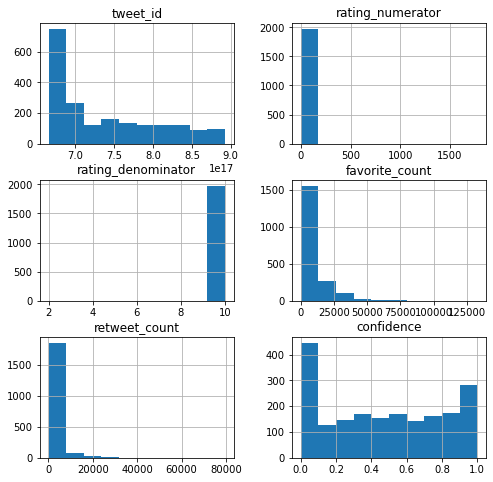

In [79]:
# view histogram 
df.hist(figsize = (8,8));

### 1. what breed of dog is the most tweeted?

In [80]:
# lets confirm the value counts of dog breeds in order
df.breed.value_counts().nlargest(20)

Unknown                      307
golden retriever             155
labrador retriever           105
pembroke                      95
chihuahua                     90
pug                           62
toy poodle                    51
chow                          47
samoyed                       42
pomeranian                    42
malamute                      33
french bulldog                31
chesapeake bay retriever      31
cocker spaniel                30
miniature pinscher            25
eskimo dog                    22
cardigan                      21
staffordshire bullterrier     21
german shepherd               21
shih-tzu                      20
Name: breed, dtype: int64

In [81]:
# exclude the unknown breed from our analysis as it would affect it
df.loc[df['breed'] == 'Unknown', 'breed'] = None

In [82]:
breed = df.breed.value_counts().nlargest(10)
breed

golden retriever      155
labrador retriever    105
pembroke               95
chihuahua              90
pug                    62
toy poodle             51
chow                   47
pomeranian             42
samoyed                42
malamute               33
Name: breed, dtype: int64

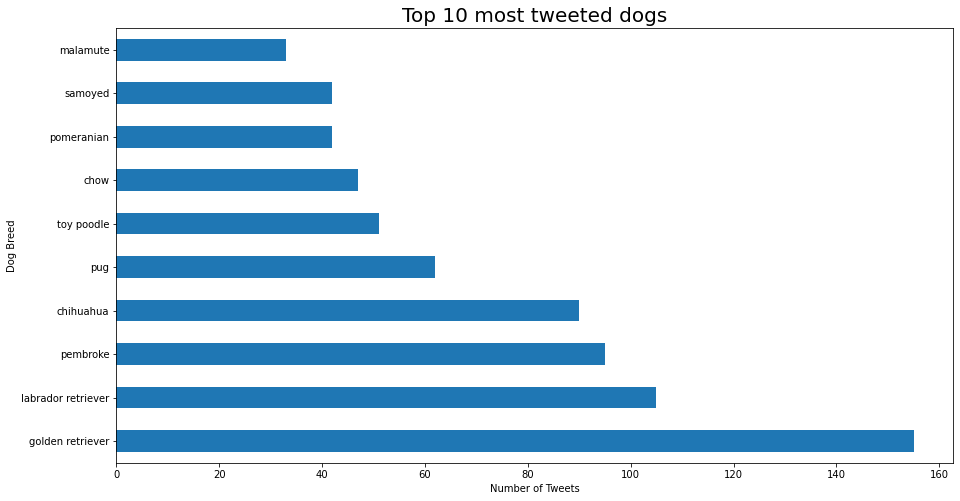

In [83]:
fig = plt.figure(figsize=(15,8))
breed.plot(kind='barh')
plt.title("Top 10 most tweeted dogs",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets"); 

Golden retriever was the most tweeted breed of dogs on We Rate Dog's twitter account, followed by labrador retriever, pembroke and chihuahua. 

## 2. what breed of dog is the most liked?

In [84]:
# Get the number of likes grouped by the dog breeds in order(from largest)
df.groupby('breed')['favorite_count'].mean().nlargest(20)

breed
saluki                     24060.000000
bedlington terrier         21153.166667
french bulldog             18416.806452
bouvier des flandres       18032.000000
afghan hound               17326.666667
black-and-tan coonhound    17012.000000
flat-coated retriever      16791.625000
irish water spaniel        16400.000000
leonberg                   14934.333333
english springer           14138.300000
standard poodle            13912.818182
samoyed                    13902.523810
mexican hairless           13590.571429
cocker spaniel             13580.400000
border terrier             13578.000000
great pyrenees             13117.571429
whippet                    12911.454545
cardigan                   12840.190476
golden retriever           12399.064516
tibetan mastiff            12173.500000
Name: favorite_count, dtype: float64

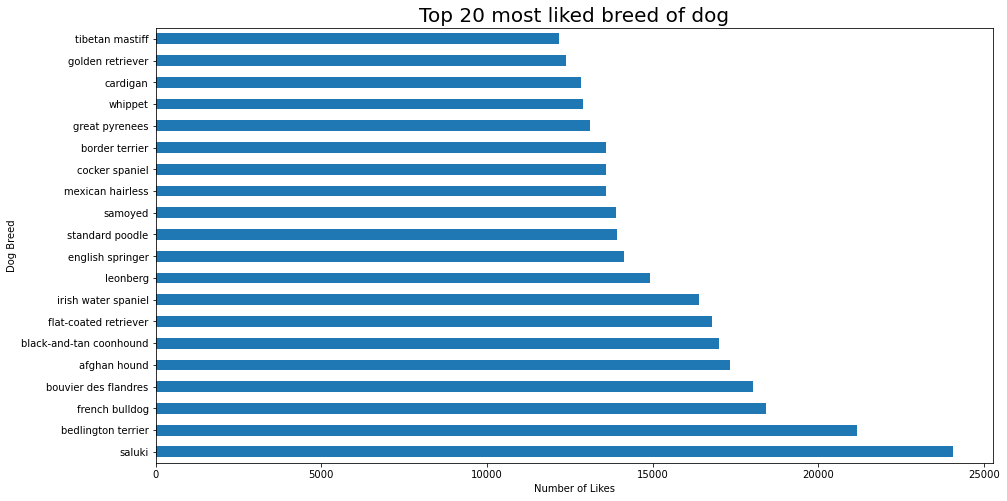

In [85]:
# plot a barchart

fig = plt.figure(figsize=(15,8))
df.groupby('breed')['favorite_count'].mean().nlargest(20).plot(kind='barh')
plt.title("Top 20 most liked breed of dog",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Likes"); 

On an average, we see that the **Saluki** breed is the most liked dog on 'We Rate Dogs' twitter account. 

## 3. what breed of dog recieved the highest rating?

In [86]:
df.groupby('breed')['rating_numerator'].mean().nlargest(20)

breed
clumber                    27.000000
bouvier des flandres       13.000000
saluki                     12.500000
pomeranian                 12.476190
briard                     12.333333
tibetan mastiff            12.250000
border terrier             12.142857
silky terrier              12.000000
standard schnauzer         12.000000
gordon setter              11.750000
irish setter               11.750000
samoyed                    11.690476
golden retriever           11.632258
kuvasz                     11.611111
australian terrier         11.500000
giant schnauzer            11.500000
wire-haired fox terrier    11.500000
great pyrenees             11.428571
norfolk terrier            11.428571
pembroke                   11.410526
Name: rating_numerator, dtype: float64

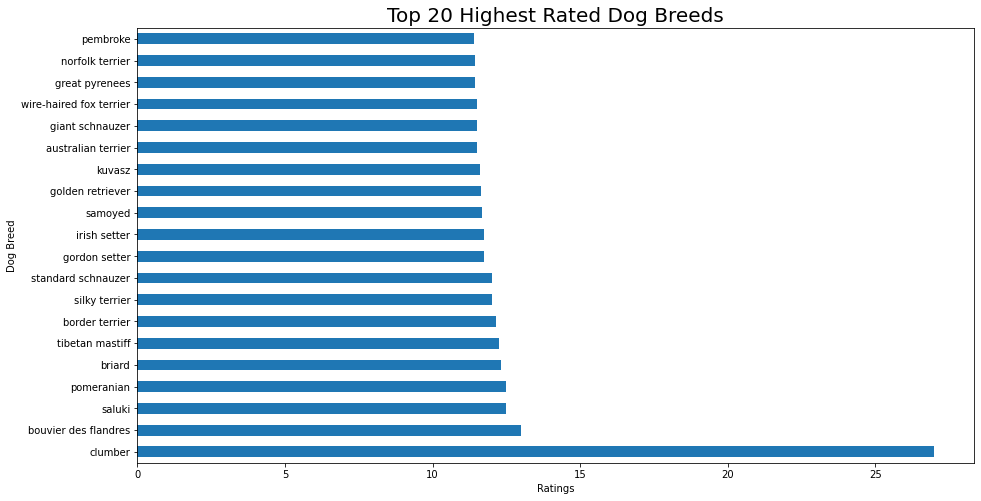

In [87]:
fig = plt.figure(figsize=(15,8))
df.groupby('breed')['rating_numerator'].mean().nlargest(20).plot(kind='barh')
plt.title("Top 20 Highest Rated Dog Breeds",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Ratings"); 

The Clumber breed recieved the highest rating, wow!

### Insights:
1. Golden retriever was the most tweeted breed of dogs on We Rate Dog's twitter account

2. The Saluki breed is the most liked dog on 'We Rate Dogs' twitter account

3. The Clumber breed recieved the highest rating